# Trial

Essential libraries

In [83]:
import numpy as np
import matplotlib.pyplot as plt

Making arrays of N, Z, A and y the binding Energies

In [84]:
N = np.genfromtxt('expthediff.dat',usecols=0) #Number of neutrons
Z = np.genfromtxt('expthediff.dat',usecols=1) #Number of protons
A = N+Z # Total number of Nucleons
# Difference between the experimental binding energy and the Liquid drop model
y = np.genfromtxt('expthediff.dat',usecols=2)



plotting Binding Energies against N, Y, A and against the Nuclear Chart.

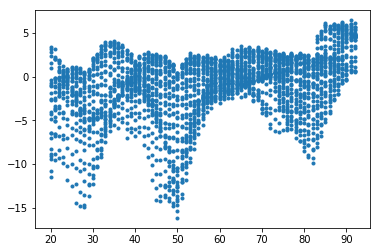

In [85]:
plt.plot(Z,y,'o',markersize=3)
plt.show()

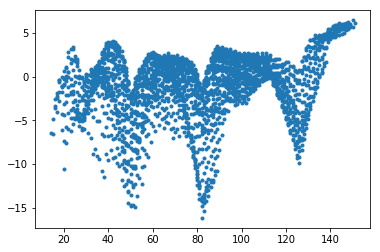

In [86]:
plt.plot(N,y,'o',markersize=3)
plt.show()

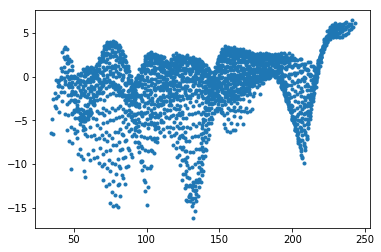

In [87]:
plt.plot(A,y,'o',markersize=3)
plt.show()

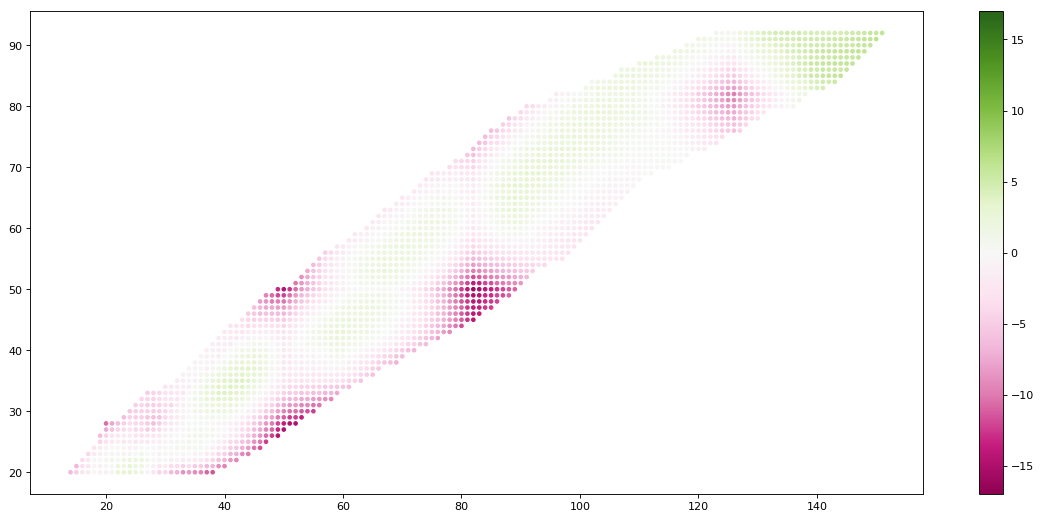

In [88]:
ext = np.int(np.ceil(max(-np.min(y),np.max(y))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N,Z,c=y,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X = np.transpose(np.stack((N,Z)))
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(2695, 2)
(2021, 2)
(674, 2)


In [91]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler().fit(X_train) # This sets the shifting and scaling so the training features have mean zero and variance 1

Xs_train = scaler.transform(X_train) # Scaling the training features


Xs_test = scaler.transform(X_test) #Using the SAME scaling on the test features in order to get the correct score

In [101]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf.fit(Xs_train, y_train);

In [102]:

predictions=rf.predict(Xs_train)
errors = abs(predictions-y_train)

print('Mean Absolute Error for train data:', round(np.mean(errors), 5), )
Etrain1=round(np.mean(errors), 5)



predictions=rf.predict(Xs_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error for test data:', round(np.mean(errors), 5), '\n\n\n' )
Etest1=round(np.mean(errors), 5)



Mean Absolute Error for train data: 0.11536
Mean Absolute Error for test data: 0.29717 





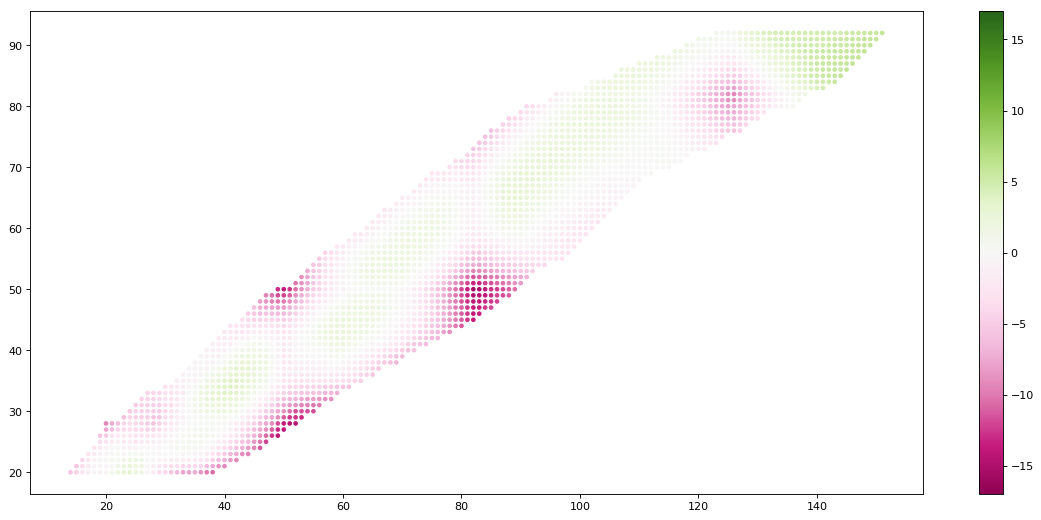

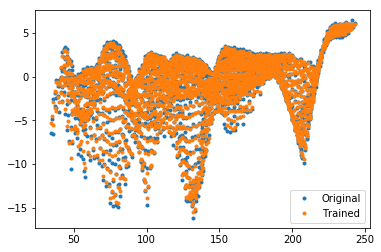

In [103]:
Xs = scaler.transform(X)
pred_all = rf.predict(Xs) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()


# adding magic numbers feature




In [108]:
X=np.transpose(np.stack((N,Z,N+Z,N-Z,np.exp(-(20-N)**2/20.),np.exp(-(20-Z)**2/20.),np.exp(-(28-N)**2/20.),np.exp(-(28-Z)**2/20.),np.exp(-(50-N)**2/20.),np.exp(-(50-Z)**2/20.),np.exp(-(80-N)**2/20.),np.exp(-(80-Z)**2/20.),np.exp(-(126-N)**2/20.),np.exp(-(126-Z)**2/20.))))

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y)

scaler = StandardScaler().fit(X_train) # This sets the shifting and scaling so the training features have mean zero and variance 1

Xs_train = scaler.transform(X_train) # Scaling the training features


Xs_test = scaler.transform(X_test) #Using the SAME scaling on the test features in order to get the correct score



In [109]:
# Instantiate model 
#rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf.fit(Xs_train, y_train);

In [110]:


print('Mean Absolute Error for Xs_train data:', Etrain1)
print('Mean Absolute Error for Xs_test data:', Etest1, "\n\n")


predictions=rf.predict(Xs_train)

errors = abs(predictions- y_train)

print('Mean Absolute Error for Xs_train data', round(np.mean(errors), 5), )
Etrain2=round(np.mean(errors),5)

predictions=rf.predict(Xs_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)


# Print out the mean absolute error (mae)
print('Mean Absolute Error for Xs_test data:', round(np.mean(errors), 5), '\n\n\n')
Etest2=round(np.mean(errors),5)

imprtest=Etest2-Etest1
imprtrain=Etrain2-Etrain1

print('Improvement of the train error:', imprtrain)
print('Improvement of the test error:', imprtest)

Mean Absolute Error for Xs_train data: 0.11536
Mean Absolute Error for Xs_test data: 0.29717 


Mean Absolute Error for Xs_train data 0.11888
Mean Absolute Error for Xs_test data: 0.29714 



Improvement of the train error: 0.0035199999999999954
Improvement of the test error: -2.999999999997449e-05


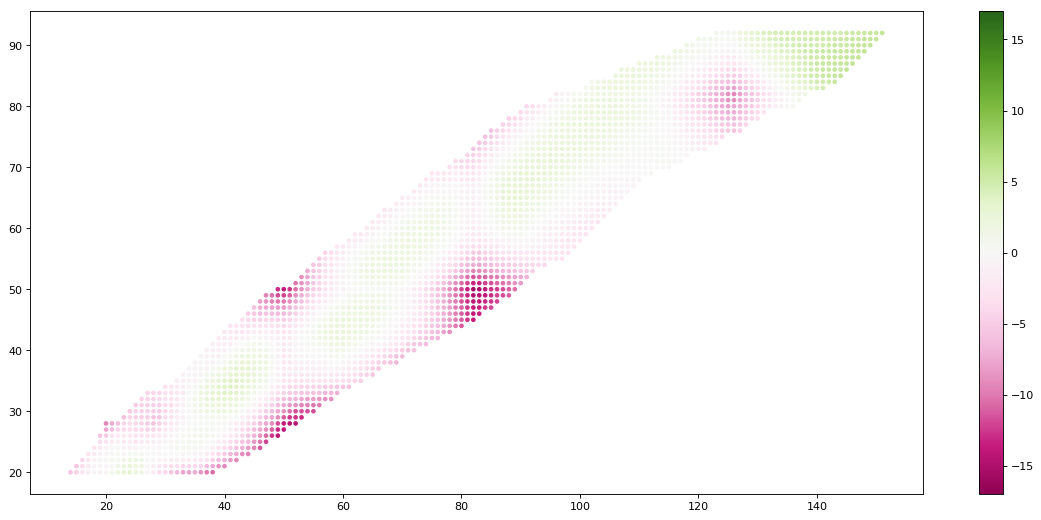

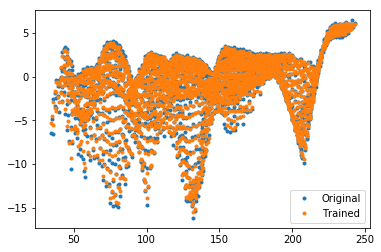

In [99]:
Xs = scaler.transform(X)
pred_all = rf.predict(Xs) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()

